In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nox-data/data.csv


In [2]:
target = 'NOX转换值($mg/m^{3}$)'
time_col = "时间"
DATE = "date"

In [3]:
df = pd.read_csv("/kaggle/input/nox-data/data.csv", parse_dates = ["时间"])

<Axes: >

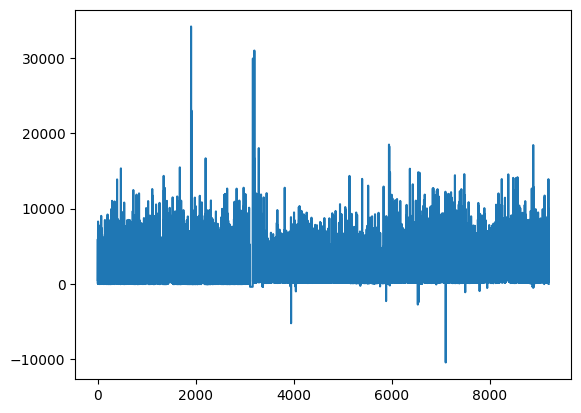

In [4]:
df[target].plot()

In [5]:
df[DATE] = df[time_col].dt.date
df[DATE] = pd.to_datetime(df[DATE])

In [6]:
from matplotlib import pyplot as plt

In [7]:
df[df[DATE] == pd.to_datetime("2023-12-11")]

,时间,NOX转换值($mg/m^{3}$),date
0,2023-12-11 18:45:00,517.094017,2023-12-11
1,2023-12-11 18:50:00,5942.124578,2023-12-11
2,2023-12-11 18:55:00,48.962156,2023-12-11
3,2023-12-11 19:00:00,883.028091,2023-12-11
4,2023-12-11 19:05:00,4790.964608,2023-12-11
...,...,...,...
58,2023-12-11 23:35:00,6582.051334,2023-12-11
59,2023-12-11 23:40:00,3668.864467,2023-12-11
60,2023-12-11 23:45:00,502.930404,2023-12-11
61,2023-12-11 23:50:00,3654.945077,2023-12-11


In [8]:
plot_date =lambda date: plt.plot(df[df[DATE] == pd.to_datetime(date)][time_col], df[df[DATE] == pd.to_datetime(date)][target], ) 

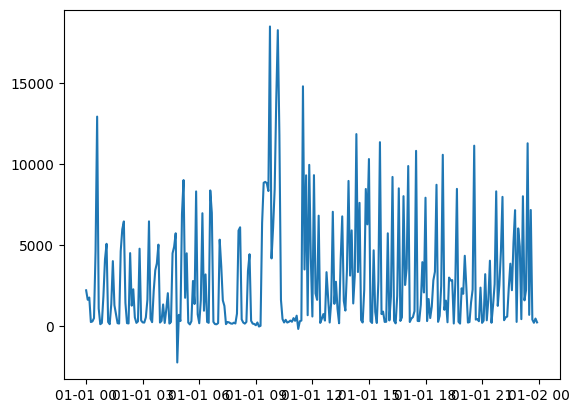

In [9]:
plot_date("2024-01-01")

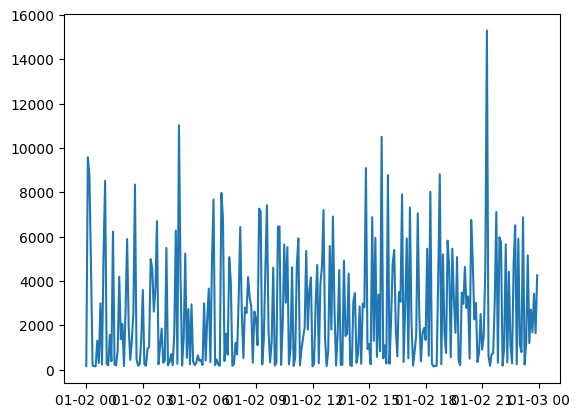

In [10]:
plot_date("2024-01-02")

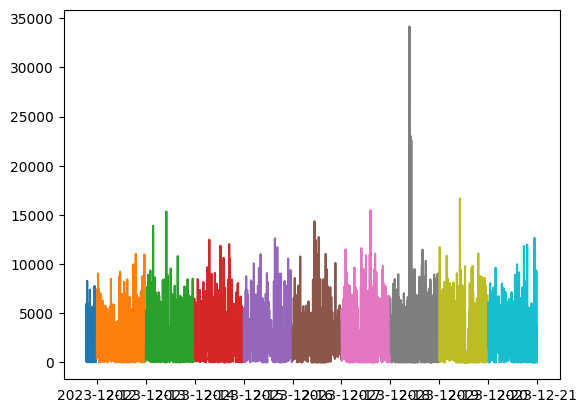

In [11]:
i = 0
for date, chunk in df.groupby([DATE]):
    plt.plot(chunk[time_col], chunk[target])
    i += 1
    if i == 10:
        break